# Lecture_6_Analyzing_and_plotting_Parallel_RHESsys_output

## 1. Creating DataFrame to analyze model output

In [1]:
import os
start_date = '2008 1 1 1'
end_date = '2012 12 31 1'
path = os.path.join(os.getcwd(), 'parallel_input')

In [2]:
import numpy as np
def safe_arange(start, stop, step):
    a = np.arange(start, stop, step)
    result =[]
    for i in a:
        par = round(i, 10)
        result = np.append(result, par)
    return result

In [3]:
# set each paremters to create ensemble simulation
param_options = {
    's1': safe_arange(1, 20, 0.5),  
    's2': safe_arange(0.4, 2.4, 0.1)
}

In [4]:
def parameter_product(list_config):
    return {'++'+'++'.join('{}={}'.format(k, v) for k, v in d.items())+'++':
            {'parameters': d} for d in pr.utils.product_dict(**list_config)}

## 1. Collecting Parallel RHESSys model outputs

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import json
import os

In [2]:
import glob

txtfiles = []
for file in glob.glob("/sfs/qumulo/qhome/yc5ef/pyrhessys/output/*.daily"):
    txtfiles.append(file)

In [3]:
txtfiles.sort()

* Check each RHESSys model output if there are some failures to complete RHESSys model simulations. If there are some failures of model simulation, delete that RHESSys model outputs. Then collect the RHESSys model outputs again.

In [4]:
for i, values in enumerate(txtfiles):
    coweeta = pd.read_csv(values, delimiter=" ")
    if len(coweeta) < 1826:
        print(len(coweeta), values)

In [110]:
txtfiles = []
for file in glob.glob("/sfs/qumulo/qhome/yc5ef/pyrhessys/output/*.daily"):
    txtfiles.append(file)
txtfiles.sort()

In [111]:
txtfiles.sort()

## 2. Creating DataFrame using RHESSys model outputs

In [5]:
# read output text file and create DataFrame using pandas
coweeta_sim = []
for i, values in enumerate(txtfiles):
    coweeta = pd.read_csv(values, delimiter=" ")
    start_date = "2008-01-01"
    end_date = "2012-12-31"
    date_index = pd.date_range(start_date, end_date, freq='1D')
    coweeta.insert(loc=0, column='Date', value=date_index[:-1].values)
    coweeta.set_index('Date')
    coweeta_sim.append(coweeta)

In [6]:
# read description and units from output variables json file
with open(os.path.join(os.getcwd(), 'output_variables.json'), 'r') as f:
    output_variables = json.load(f)

In [7]:
# Check sample of Simulation ouput
coweeta_sim[0].head()

,Date,day,month,year,basinID,rain_thr,snow_thr,sat_def_z,sat_def,rz_storage,...,apipedrainNH4,apipedrainDON,apipedrainDOC,lawnIrrigated,septicQ,laiNontree,PAR,unsat_cap,unsat_fc,rtz_fc
0,2008-01-01,1,1,2008,1,0.0,0.0,5.732812,2.348269,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7.894255e+06,2.348269,2.348054,0.0
1,2008-01-02,2,1,2008,1,0.0,0.0,13.881903,5.682374,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7.894255e+06,5.682374,5.675985,0.0
2,2008-01-03,3,1,2008,1,0.0,0.0,24.606404,10.062338,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.332557e+06,10.062338,10.029938,0.0
3,2008-01-04,4,1,2008,1,0.0,0.0,37.817616,15.445542,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.216200e+06,15.445542,15.357591,0.0
4,2008-01-05,5,1,2008,1,0.0,0.0,53.366799,21.762650,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.182318e+07,21.762650,21.585280,0.0


In [8]:
coweeta_sim[0].tail()

,Date,day,month,year,basinID,rain_thr,snow_thr,sat_def_z,sat_def,rz_storage,...,apipedrainNH4,apipedrainDON,apipedrainDOC,lawnIrrigated,septicQ,laiNontree,PAR,unsat_cap,unsat_fc,rtz_fc
1821,2012-12-26,26,12,2012,1,0.0,0.0,226.682398,90.606600,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7.535264e+06,90.606600,88.682690,0.0
1822,2012-12-27,27,12,2012,1,0.0,0.0,255.549258,101.809315,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.282436e+06,101.809315,99.541258,0.0
1823,2012-12-28,28,12,2012,1,2.0,0.0,280.182100,111.269652,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.451563e+05,111.269652,108.670141,0.0
1824,2012-12-29,29,12,2012,1,0.0,0.0,307.855558,121.845413,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7.535264e+06,121.845413,118.893767,0.0
1825,2012-12-30,30,12,2012,1,5.8,0.0,311.500582,122.947810,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,9.800840e+06,122.947810,119.796220,0.0


In [9]:
# read output text file and create DataFrame using pandas
coweeta_sim_cal = []
for i in range(len(txtfiles)):
    #coweeta_sim[i].iloc[366:]
    coweeta_sim_cal.append(coweeta_sim[i].iloc[731:])

In [10]:
coweeta_sim_cal[1]

,Date,day,month,year,basinID,rain_thr,snow_thr,sat_def_z,sat_def,rz_storage,...,apipedrainNH4,apipedrainDON,apipedrainDOC,lawnIrrigated,septicQ,laiNontree,PAR,unsat_cap,unsat_fc,rtz_fc
731,2010-01-01,1,1,2010,1,10.2,0.0,106.780432,42.218688,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.576643e+04,42.218688,41.140876,0.0
732,2010-01-02,2,1,2010,1,0.0,0.0,113.395918,44.939072,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.811305e+06,44.939072,43.839285,0.0
733,2010-01-03,3,1,2010,1,0.0,0.0,123.267787,48.918771,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.132255e+06,48.918771,47.764348,0.0
734,2010-01-04,4,1,2010,1,0.0,0.0,135.452002,53.802901,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.122555e+06,53.802901,52.568242,0.0
735,2010-01-05,5,1,2010,1,0.0,0.0,149.665522,59.478406,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.256104e+06,59.478406,58.137008,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,2012-12-26,26,12,2012,1,0.0,0.0,227.075870,90.756459,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7.535264e+06,90.756459,88.826855,0.0
1822,2012-12-27,27,12,2012,1,0.0,0.0,255.979683,101.972952,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.282436e+06,101.972952,99.698465,0.0
1823,2012-12-28,28,12,2012,1,2.0,0.0,280.647023,111.445959,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.451563e+05,111.445959,108.839443,0.0
1824,2012-12-29,29,12,2012,1,0.0,0.0,308.364162,122.038192,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7.535264e+06,122.038192,119.078748,0.0


In [11]:
coweeta_sim = coweeta_sim_cal

## 3. Creating DataFrame using Obervation data

In [12]:
# Create obs directory to copy observation data from raw data folder
import shutil
obsDIR = os.path.join(os.getcwd(), 'obs')
if not os.path.exists(obsDIR):
    os.mkdir(obsDIR)
else:
    pass

In [13]:
# read observation csv file and check observation period using head() and tail() function
obs_flow_all = pd.read_csv(os.path.join(obsDIR, 'streamflow.csv'))
obs_flow_all.head()

,date1,date,dischargeM3S
0,9/30/2007,2007-09-30,0.001133
1,10/1/2007,2007-10-01,0.000000
2,10/2/2007,2007-10-02,0.000000
3,10/3/2007,2007-10-03,0.000000
4,10/4/2007,2007-10-04,0.000283


In [16]:
obs_flow_all['discharge (mm)'] = obs_flow_all['dischargeM3S'].values*86400*1000/13997200
obs_flow_all.tail()

,date1,date,dischargeM3S,discharge (mm)
4627,5/31/2020,2020-05-31,0.081835,0.505139
4628,6/1/2020,2020-06-01,0.077021,0.475425
4629,6/2/2020,2020-06-02,0.076455,0.471930
4630,6/3/2020,2020-06-03,0.073623,0.454451
4631,6/4/2020,2020-06-04,0.285997,1.765366


In [17]:
# set index as date and time and extract observation data for particular periods
start_date = "2010-01-01"
end_date = "2012-12-30"
obs_flow_all = obs_flow_all.set_index('date')
obs_flow_range = obs_flow_all[start_date:end_date]
obs_flow_range.head()

,date1,dischargeM3S,discharge (mm)
date,,,
2010-01-01,1/1/2010,0.308651,1.905197
2010-01-02,1/2/2010,0.146114,0.901910
2010-01-03,1/3/2010,0.125442,0.774314
2010-01-04,1/4/2010,0.107603,0.664197
2010-01-05,1/5/2010,0.097126,0.599525


In [18]:
obs_flow_range.tail()

,date1,dischargeM3S,discharge (mm)
date,,,
2012-12-26,12/26/2012,1.554580,9.595900
2012-12-27,12/27/2012,1.104347,6.816759
2012-12-28,12/28/2012,0.319977,1.975112
2012-12-29,12/29/2012,0.173864,1.073203
2012-12-30,12/30/2012,0.121195,0.748096


## 4. Rearranging DataFrames of Simulation and Observation data

In [19]:
# set index as Data column and display data table
coweeta_sim_index = coweeta_sim[0].set_index('Date')
coweeta_sim_index.head()

,day,month,year,basinID,rain_thr,snow_thr,sat_def_z,sat_def,rz_storage,unsat_stor,...,apipedrainNH4,apipedrainDON,apipedrainDOC,lawnIrrigated,septicQ,laiNontree,PAR,unsat_cap,unsat_fc,rtz_fc
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-01,1,1,2010,1,10.2,0.0,106.369619,42.054425,0.0,39.765769,...,0.0,0.0,0.0,0.0,0.0,0.0,8.576643e+04,42.054425,40.981221,0.0
2010-01-02,2,1,2010,1,0.0,0.0,112.988025,44.776169,0.0,41.539809,...,0.0,0.0,0.0,0.0,0.0,0.0,4.811305e+06,44.776169,43.680947,0.0
2010-01-03,3,1,2010,1,0.0,0.0,122.849701,48.752199,0.0,44.582219,...,0.0,0.0,0.0,0.0,0.0,0.0,3.132255e+06,48.752199,47.602535,0.0
2010-01-04,4,1,2010,1,0.0,0.0,135.020878,53.631577,0.0,48.548690,...,0.0,0.0,0.0,0.0,0.0,0.0,2.122555e+06,53.631577,52.401936,0.0
2010-01-05,5,1,2010,1,0.0,0.0,149.219296,59.301574,0.0,53.328359,...,0.0,0.0,0.0,0.0,0.0,0.0,1.256104e+06,59.301574,57.965502,0.0


In [20]:
# extract streamflow simulation data from rhessys simulation output and create columns according to each ensembel simulations
coweeta_sim_stream = pd.DataFrame()
for i, k in enumerate(txtfiles):
    coweeta_sim_stream[k] = coweeta_sim[i]['streamflow']

In [22]:
# set index as Data and display data table
coweeta_sim_stream.index = coweeta_sim_index.index
coweeta_sim_stream.head()

,/sfs/qumulo/qhome/yc5ef/pyrhessys/output/++s1=1.0++s2=0.4++_basin.daily,/sfs/qumulo/qhome/yc5ef/pyrhessys/output/++s1=1.0++s2=0.5++_basin.daily,/sfs/qumulo/qhome/yc5ef/pyrhessys/output/++s1=1.0++s2=0.6++_basin.daily,/sfs/qumulo/qhome/yc5ef/pyrhessys/output/++s1=1.0++s2=0.7++_basin.daily,/sfs/qumulo/qhome/yc5ef/pyrhessys/output/++s1=1.0++s2=0.8++_basin.daily,/sfs/qumulo/qhome/yc5ef/pyrhessys/output/++s1=1.0++s2=0.9++_basin.daily,/sfs/qumulo/qhome/yc5ef/pyrhessys/output/++s1=1.0++s2=1.0++_basin.daily,/sfs/qumulo/qhome/yc5ef/pyrhessys/output/++s1=1.0++s2=1.1++_basin.daily,/sfs/qumulo/qhome/yc5ef/pyrhessys/output/++s1=1.0++s2=1.2++_basin.daily,/sfs/qumulo/qhome/yc5ef/pyrhessys/output/++s1=1.0++s2=1.3++_basin.daily,...,/sfs/qumulo/qhome/yc5ef/pyrhessys/output/++s1=9.5++s2=1.4++_basin.daily,/sfs/qumulo/qhome/yc5ef/pyrhessys/output/++s1=9.5++s2=1.5++_basin.daily,/sfs/qumulo/qhome/yc5ef/pyrhessys/output/++s1=9.5++s2=1.6++_basin.daily,/sfs/qumulo/qhome/yc5ef/pyrhessys/output/++s1=9.5++s2=1.7++_basin.daily,/sfs/qumulo/qhome/yc5ef/pyrhessys/output/++s1=9.5++s2=1.8++_basin.daily,/sfs/qumulo/qhome/yc5ef/pyrhessys/output/++s1=9.5++s2=1.9++_basin.daily,/sfs/qumulo/qhome/yc5ef/pyrhessys/output/++s1=9.5++s2=2.0++_basin.daily,/sfs/qumulo/qhome/yc5ef/pyrhessys/output/++s1=9.5++s2=2.1++_basin.daily,/sfs/qumulo/qhome/yc5ef/pyrhessys/output/++s1=9.5++s2=2.2++_basin.daily,/sfs/qumulo/qhome/yc5ef/pyrhessys/output/++s1=9.5++s2=2.3++_basin.daily
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-01,6.060480,6.057400,6.054675,6.053939,6.052695,6.050844,6.048270,6.047337,6.046438,6.045634,...,6.041512,6.040714,6.039859,6.039383,6.039055,6.038934,6.038757,6.038644,6.038667,6.038551
2010-01-02,1.833119,1.834045,1.834603,1.835549,1.836138,1.836590,1.836546,1.836932,1.837301,1.837569,...,1.839463,1.839652,1.839669,1.839809,1.839930,1.840087,1.840171,1.840252,1.840378,1.840427
2010-01-03,1.627029,1.627709,1.628137,1.628946,1.629467,1.629867,1.629846,1.630187,1.630504,1.630722,...,1.632769,1.632906,1.632863,1.632936,1.632998,1.633103,1.633149,1.633199,1.633287,1.633318
2010-01-04,1.581615,1.582249,1.582671,1.583464,1.583939,1.584310,1.584329,1.584654,1.584931,1.585140,...,1.587074,1.587239,1.587194,1.587274,1.587386,1.587492,1.587538,1.587594,1.587678,1.587712
2010-01-05,1.536217,1.536913,1.537311,1.538003,1.538491,1.538828,1.538838,1.539128,1.539458,1.539647,...,1.541405,1.541562,1.541543,1.541643,1.541710,1.541819,1.541878,1.541939,1.542019,1.542053


In [23]:
# extract simulation data as same as observation periods
coweeta_sim_stream_range = coweeta_sim_stream['2010-01-01':'2012-12-31']
coweeta_sim_stream_range.head()

,/sfs/qumulo/qhome/yc5ef/pyrhessys/output/++s1=1.0++s2=0.4++_basin.daily,/sfs/qumulo/qhome/yc5ef/pyrhessys/output/++s1=1.0++s2=0.5++_basin.daily,/sfs/qumulo/qhome/yc5ef/pyrhessys/output/++s1=1.0++s2=0.6++_basin.daily,/sfs/qumulo/qhome/yc5ef/pyrhessys/output/++s1=1.0++s2=0.7++_basin.daily,/sfs/qumulo/qhome/yc5ef/pyrhessys/output/++s1=1.0++s2=0.8++_basin.daily,/sfs/qumulo/qhome/yc5ef/pyrhessys/output/++s1=1.0++s2=0.9++_basin.daily,/sfs/qumulo/qhome/yc5ef/pyrhessys/output/++s1=1.0++s2=1.0++_basin.daily,/sfs/qumulo/qhome/yc5ef/pyrhessys/output/++s1=1.0++s2=1.1++_basin.daily,/sfs/qumulo/qhome/yc5ef/pyrhessys/output/++s1=1.0++s2=1.2++_basin.daily,/sfs/qumulo/qhome/yc5ef/pyrhessys/output/++s1=1.0++s2=1.3++_basin.daily,...,/sfs/qumulo/qhome/yc5ef/pyrhessys/output/++s1=9.5++s2=1.4++_basin.daily,/sfs/qumulo/qhome/yc5ef/pyrhessys/output/++s1=9.5++s2=1.5++_basin.daily,/sfs/qumulo/qhome/yc5ef/pyrhessys/output/++s1=9.5++s2=1.6++_basin.daily,/sfs/qumulo/qhome/yc5ef/pyrhessys/output/++s1=9.5++s2=1.7++_basin.daily,/sfs/qumulo/qhome/yc5ef/pyrhessys/output/++s1=9.5++s2=1.8++_basin.daily,/sfs/qumulo/qhome/yc5ef/pyrhessys/output/++s1=9.5++s2=1.9++_basin.daily,/sfs/qumulo/qhome/yc5ef/pyrhessys/output/++s1=9.5++s2=2.0++_basin.daily,/sfs/qumulo/qhome/yc5ef/pyrhessys/output/++s1=9.5++s2=2.1++_basin.daily,/sfs/qumulo/qhome/yc5ef/pyrhessys/output/++s1=9.5++s2=2.2++_basin.daily,/sfs/qumulo/qhome/yc5ef/pyrhessys/output/++s1=9.5++s2=2.3++_basin.daily
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-01,6.060480,6.057400,6.054675,6.053939,6.052695,6.050844,6.048270,6.047337,6.046438,6.045634,...,6.041512,6.040714,6.039859,6.039383,6.039055,6.038934,6.038757,6.038644,6.038667,6.038551
2010-01-02,1.833119,1.834045,1.834603,1.835549,1.836138,1.836590,1.836546,1.836932,1.837301,1.837569,...,1.839463,1.839652,1.839669,1.839809,1.839930,1.840087,1.840171,1.840252,1.840378,1.840427
2010-01-03,1.627029,1.627709,1.628137,1.628946,1.629467,1.629867,1.629846,1.630187,1.630504,1.630722,...,1.632769,1.632906,1.632863,1.632936,1.632998,1.633103,1.633149,1.633199,1.633287,1.633318
2010-01-04,1.581615,1.582249,1.582671,1.583464,1.583939,1.584310,1.584329,1.584654,1.584931,1.585140,...,1.587074,1.587239,1.587194,1.587274,1.587386,1.587492,1.587538,1.587594,1.587678,1.587712
2010-01-05,1.536217,1.536913,1.537311,1.538003,1.538491,1.538828,1.538838,1.539128,1.539458,1.539647,...,1.541405,1.541562,1.541543,1.541643,1.541710,1.541819,1.541878,1.541939,1.542019,1.542053


In [24]:
# add observation data into simulation data frame
coweeta_sim_stream_range['obs_stream'] = obs_flow_range['discharge (mm)'].values
coweeta_sim_stream_range.head()

/opt/conda/lib/python3.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,/sfs/qumulo/qhome/yc5ef/pyrhessys/output/++s1=1.0++s2=0.4++_basin.daily,/sfs/qumulo/qhome/yc5ef/pyrhessys/output/++s1=1.0++s2=0.5++_basin.daily,/sfs/qumulo/qhome/yc5ef/pyrhessys/output/++s1=1.0++s2=0.6++_basin.daily,/sfs/qumulo/qhome/yc5ef/pyrhessys/output/++s1=1.0++s2=0.7++_basin.daily,/sfs/qumulo/qhome/yc5ef/pyrhessys/output/++s1=1.0++s2=0.8++_basin.daily,/sfs/qumulo/qhome/yc5ef/pyrhessys/output/++s1=1.0++s2=0.9++_basin.daily,/sfs/qumulo/qhome/yc5ef/pyrhessys/output/++s1=1.0++s2=1.0++_basin.daily,/sfs/qumulo/qhome/yc5ef/pyrhessys/output/++s1=1.0++s2=1.1++_basin.daily,/sfs/qumulo/qhome/yc5ef/pyrhessys/output/++s1=1.0++s2=1.2++_basin.daily,/sfs/qumulo/qhome/yc5ef/pyrhessys/output/++s1=1.0++s2=1.3++_basin.daily,...,/sfs/qumulo/qhome/yc5ef/pyrhessys/output/++s1=9.5++s2=1.5++_basin.daily,/sfs/qumulo/qhome/yc5ef/pyrhessys/output/++s1=9.5++s2=1.6++_basin.daily,/sfs/qumulo/qhome/yc5ef/pyrhessys/output/++s1=9.5++s2=1.7++_basin.daily,/sfs/qumulo/qhome/yc5ef/pyrhessys/output/++s1=9.5++s2=1.8++_basin.daily,/sfs/qumulo/qhome/yc5ef/pyrhessys/output/++s1=9.5++s2=1.9++_basin.daily,/sfs/qumulo/qhome/yc5ef/pyrhessys/output/++s1=9.5++s2=2.0++_basin.daily,/sfs/qumulo/qhome/yc5ef/pyrhessys/output/++s1=9.5++s2=2.1++_basin.daily,/sfs/qumulo/qhome/yc5ef/pyrhessys/output/++s1=9.5++s2=2.2++_basin.daily,/sfs/qumulo/qhome/yc5ef/pyrhessys/output/++s1=9.5++s2=2.3++_basin.daily,obs_stream
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-01,6.060480,6.057400,6.054675,6.053939,6.052695,6.050844,6.048270,6.047337,6.046438,6.045634,...,6.040714,6.039859,6.039383,6.039055,6.038934,6.038757,6.038644,6.038667,6.038551,1.905197
2010-01-02,1.833119,1.834045,1.834603,1.835549,1.836138,1.836590,1.836546,1.836932,1.837301,1.837569,...,1.839652,1.839669,1.839809,1.839930,1.840087,1.840171,1.840252,1.840378,1.840427,0.901910
2010-01-03,1.627029,1.627709,1.628137,1.628946,1.629467,1.629867,1.629846,1.630187,1.630504,1.630722,...,1.632906,1.632863,1.632936,1.632998,1.633103,1.633149,1.633199,1.633287,1.633318,0.774314
2010-01-04,1.581615,1.582249,1.582671,1.583464,1.583939,1.584310,1.584329,1.584654,1.584931,1.585140,...,1.587239,1.587194,1.587274,1.587386,1.587492,1.587538,1.587594,1.587678,1.587712,0.664197
2010-01-05,1.536217,1.536913,1.537311,1.538003,1.538491,1.538828,1.538838,1.539128,1.539458,1.539647,...,1.541562,1.541543,1.541643,1.541710,1.541819,1.541878,1.541939,1.542019,1.542053,0.599525


## 5. Analyzing RMSE and NSE to evaluate Simulation outputs

In [25]:
from hydroeval import *

In [26]:
def analysis(observation, simulation):
    RMSE = evaluator(rmse, observation, simulation)
    NSE = evaluator(nse, observation, simulation)
    return RMSE, NSE

In [27]:
analysis_df = pd.DataFrame(index=[i for i in txtfiles])
analysis_df.head()

""
/sfs/qumulo/qhome/yc5ef/pyrhessys/output/++s1=1.0++s2=0.4++_basin.daily
/sfs/qumulo/qhome/yc5ef/pyrhessys/output/++s1=1.0++s2=0.5++_basin.daily
/sfs/qumulo/qhome/yc5ef/pyrhessys/output/++s1=1.0++s2=0.6++_basin.daily
/sfs/qumulo/qhome/yc5ef/pyrhessys/output/++s1=1.0++s2=0.7++_basin.daily
/sfs/qumulo/qhome/yc5ef/pyrhessys/output/++s1=1.0++s2=0.8++_basin.daily


In [28]:
# add new columns to calulate evaluators
analysis_df["RMSE"] = 0
analysis_df["NSE"] = 0
analysis_df.head()

,RMSE,NSE
/sfs/qumulo/qhome/yc5ef/pyrhessys/output/++s1=1.0++s2=0.4++_basin.daily,0,0
/sfs/qumulo/qhome/yc5ef/pyrhessys/output/++s1=1.0++s2=0.5++_basin.daily,0,0
/sfs/qumulo/qhome/yc5ef/pyrhessys/output/++s1=1.0++s2=0.6++_basin.daily,0,0
/sfs/qumulo/qhome/yc5ef/pyrhessys/output/++s1=1.0++s2=0.7++_basin.daily,0,0
/sfs/qumulo/qhome/yc5ef/pyrhessys/output/++s1=1.0++s2=0.8++_basin.daily,0,0


In [29]:
for i, k in enumerate(txtfiles):
    RMSE, NSE = analysis(coweeta_sim_stream_range['obs_stream'].values, coweeta_sim_stream_range[k].values)
    analysis_df["RMSE"].loc[k] = RMSE
    analysis_df["NSE"].loc[k] = NSE

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [30]:
# find minimum value of evaluators and ensemble simulation list
analysis_df['NSE'].min(), analysis_df['RMSE'].min()

(-0.8150987050806497, 7.128116080111354)

## 6. Plotting RHESSys ouput and Obervation using Optimal RMSE and NSE

### 6.1 Find the best fit of RHESSys outputs

In [36]:
RMSE_Match = analysis_df["RMSE"][analysis_df["RMSE"].values == sorted(analysis_df["RMSE"])[0]].index.tolist()
RMSE_Match

['/sfs/qumulo/qhome/yc5ef/pyrhessys/output/++s1=1.5++s2=2.3++_basin.daily']

In [37]:
RMSE_Match = analysis_df["NSE"][analysis_df["NSE"].values == sorted(analysis_df["NSE"])[0]].index.tolist()
RMSE_Match

['/sfs/qumulo/qhome/yc5ef/pyrhessys/output/++s1=1.5++s2=2.3++_basin.daily']

### 6.2 Plot RHESSys Output

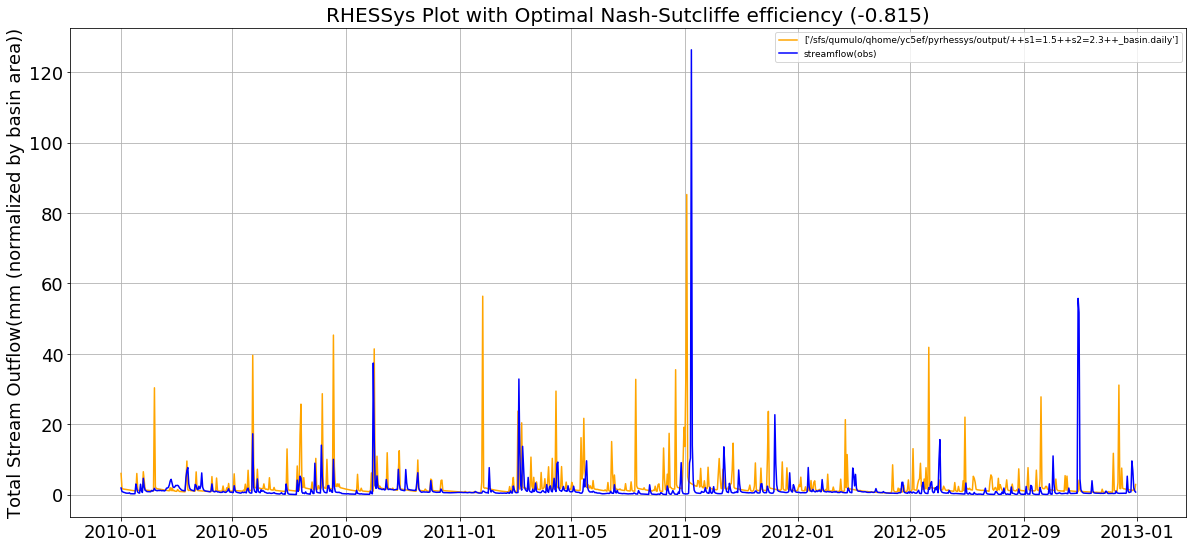

In [33]:
RMSE_Match = analysis_df["NSE"][analysis_df["NSE"].values == analysis_df["NSE"].min()].index.tolist()
# set output variables and variable description
output_variable = 'streamflow'
y_axis = output_variables[output_variable]['description']+'('+output_variables[output_variable]['Units']+')'
plt.figure(figsize=(20,9))
ax = plt.gca()
ax.plot(coweeta_sim_stream_range[RMSE_Match], label=RMSE_Match, color='orange')
ax.plot(coweeta_sim_stream_range['obs_stream'], label='streamflow(obs)', color='blue')
ax.grid(True)
ax.set_ylabel(y_axis, fontsize=18)
ax.set_title("RHESSys Plot with Optimal Nash-Sutcliffe efficiency (-0.815)", fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
ax.legend(loc='upper right', bbox_to_anchor=(1, 1), fontsize=9)

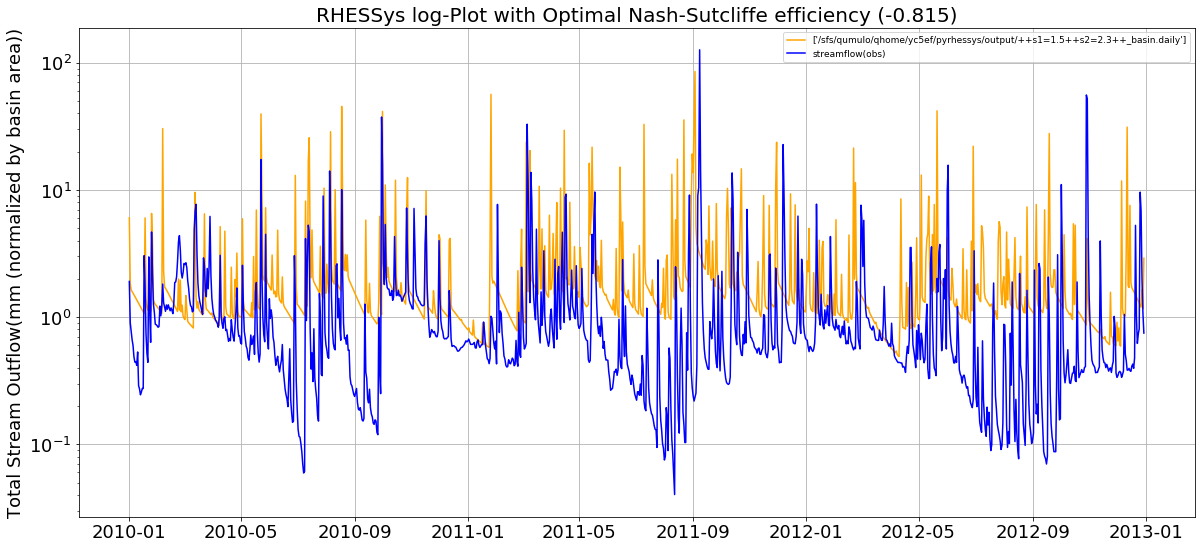

In [34]:
RMSE_Match = analysis_df["NSE"][analysis_df["NSE"].values == analysis_df["NSE"].min()].index.tolist()
# set output variables and variable description
output_variable = 'streamflow'
y_axis = output_variables[output_variable]['description']+'('+output_variables[output_variable]['Units']+')'
plt.figure(figsize=(20,9))
ax = plt.gca()
plt.yscale('log')
ax.plot(coweeta_sim_stream_range[RMSE_Match], label=RMSE_Match, color='orange')
ax.plot(coweeta_sim_stream_range['obs_stream'], label='streamflow(obs)', color='blue')
ax.grid(True)
ax.set_ylabel(y_axis, fontsize=18)
ax.set_title("RHESSys Log-Plot with Optimal Nash-Sutcliffe efficiency (-0.815)", fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
ax.legend(loc='upper right', bbox_to_anchor=(1, 1), fontsize=9)

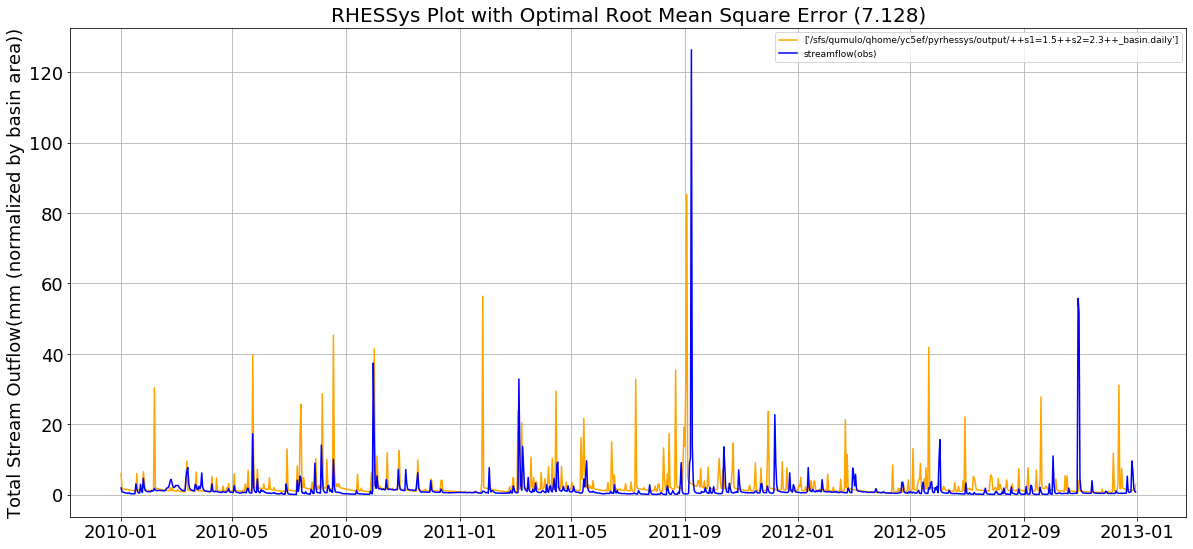

In [35]:
RMSE_Match = analysis_df["RMSE"][analysis_df["RMSE"].values == analysis_df["RMSE"].min()].index.tolist()
# set output variables and variable description
output_variable = 'streamflow'
y_axis = output_variables[output_variable]['description']+'('+output_variables[output_variable]['Units']+')'
plt.figure(figsize=(20,9))
ax = plt.gca()
ax.plot(coweeta_sim_stream_range[RMSE_Match], label=RMSE_Match, color='orange')
ax.plot(coweeta_sim_stream_range['obs_stream'], label='streamflow(obs)', color='blue')
ax.grid(True)
ax.set_ylabel(y_axis, fontsize=18)
ax.set_title("RHESSys Plot with Optimal Root Mean Square Error (7.128)", fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
ax.legend(loc='upper right', bbox_to_anchor=(1, 1), fontsize=9)

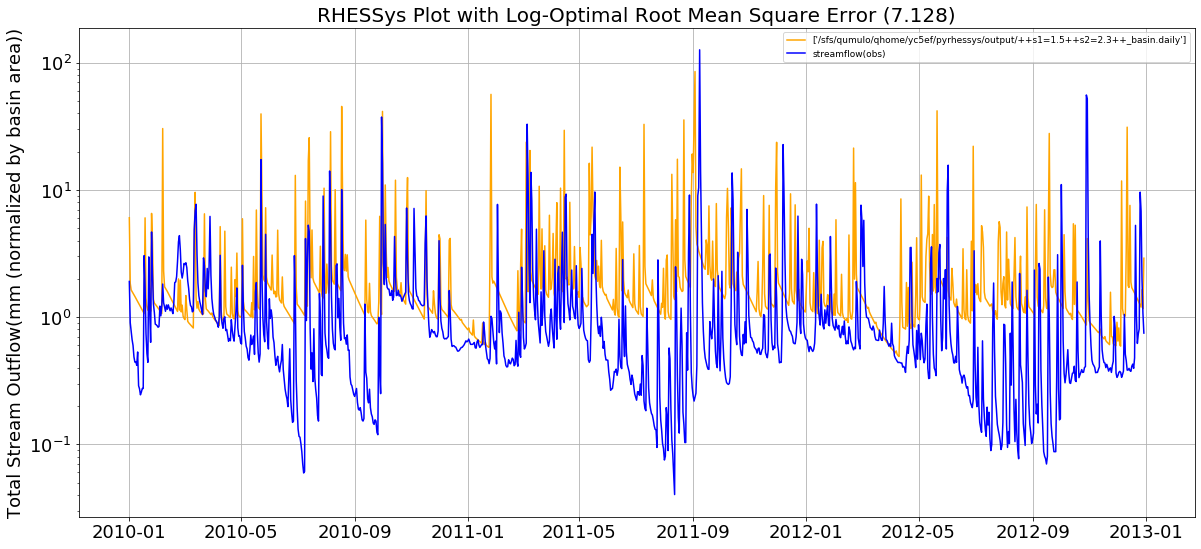

In [36]:
RMSE_Match = analysis_df["RMSE"][analysis_df["RMSE"].values == analysis_df["RMSE"].min()].index.tolist()
# set output variables and variable description
output_variable = 'streamflow'
y_axis = output_variables[output_variable]['description']+'('+output_variables[output_variable]['Units']+')'
plt.figure(figsize=(20,9))
plt.yscale('log')
ax = plt.gca()
ax.plot(coweeta_sim_stream_range[RMSE_Match], label=RMSE_Match, color='orange')
ax.plot(coweeta_sim_stream_range['obs_stream'], label='streamflow(obs)', color='blue')
ax.grid(True)
ax.set_ylabel(y_axis, fontsize=18)
ax.set_title("RHESSys Plot with Log-Optimal Root Mean Square Error (7.128)", fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
ax.legend(loc='upper right', bbox_to_anchor=(1, 1), fontsize=9)